# 桑坦德客户满意度 Santander Customer Satisfaction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error, f1_score
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
train = pd.read_csv("../data/input/train.csv")
test = pd.read_csv("../data/input/test.csv")
# sample = pd.read_csv("../input/santander-customer-satisfaction/sample_submission.csv")
sample = pd.read_csv("../data/input/sample_submission.csv")

## Description of data set 数据集描述
您将获得一个包含大量数字变量的匿名数据集。

- “Target”列是要预测的变量。不满意的客户为 1，满意的客户为 0。
- 任务是预测测试集中每个客户是不满意客户的概率。

## Preprocessing the data

In [4]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [6]:
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [7]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
print('Null values in training data is {}'.format(train.isnull().sum().any()))
print('Null values in testing data is {}'.format(test.isnull().sum().any()))

Null values in training data is False
Null values in testing data is False


In [9]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


(None, None)

### 去重

In [10]:
# Findning duplicate rows.
dupli = train[train.duplicated()]
dupli

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET


### 删除所有只有 1 个唯一值的列，因为没什么用

In [11]:
# Removing all the columns having only 1 unique value.
for i in train.columns:
    if train[i].nunique() == 1:
        print(i)
        train.drop(i, inplace = True, axis = 1)
        test.drop(i, inplace = True, axis = 1)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


## EDA

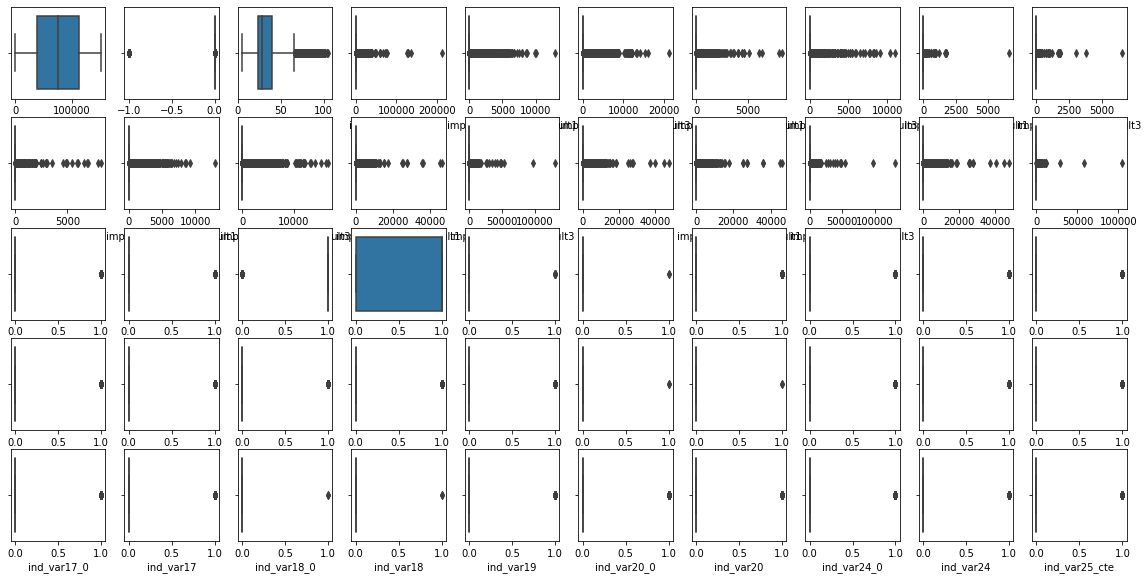

In [12]:
plt.figure(figsize = (20,20))
for i in range (50):
    plt.subplot(10, 10, i+1)
    sns.boxplot(train.iloc[:,i])
    plt.xlabel(train.columns[i], size = 10)

### 去除outlier

In [13]:
def Outliers(data, ft):
    IQ1 = data[ft].quantile(0.25)
    IQ3 = data[ft].quantile(0.75)
    IQR = IQ3 - IQ1
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    index = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound) ]
    return index

In [14]:
index = []
for i in train.columns:
    index.extend(Outliers(train, i))
index = list(set(index))
len(index)

48895

0    73012
1     3008
Name: TARGET, dtype: int64


Text(0.5, 1.0, 'Distribution in target column before resmpling')

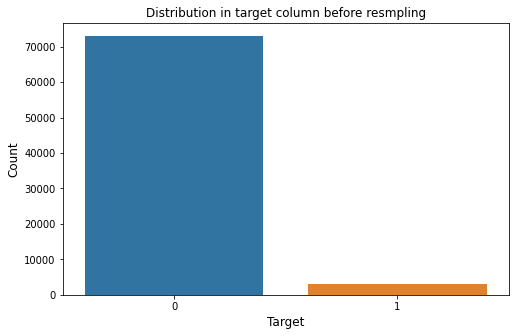

In [15]:
# Count plot for target column.
print(train['TARGET'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = train['TARGET'])
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target column before resmpling', size = 12)

In [16]:
test_id = test['ID']
train.drop('ID', inplace = True, axis = 1)
test.drop('ID', inplace = True, axis = 1)

In [17]:
x = train.drop('TARGET', axis = 1)
x.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [18]:
y = train.loc[:, 'TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [19]:
col = x.columns
std = StandardScaler()
x_std = std.fit_transform(x)
x_std = pd.DataFrame(data = x_std, columns = col)

mms = MinMaxScaler()
x_mms = mms.fit_transform(x)
x_mms = pd.DataFrame(data = x_mms, columns = col)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

## Models

In [21]:
def Models(model, name, d, xtrain, ytrain, xtest, ytest):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100
    
    F1 = f1_score(predicted, ytest)
    fpr, tpr, threshould = roc_curve(predicted, ytest)
    AUC = auc(fpr, tpr)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['F1'].append(F1)
    d['AUC'].append(AUC)
    
    print("**********"*5)
    print()
    return d

In [22]:
l = [x, x_std, x_mms]
final = []
for i in l:
    xtrain, xtest, ytrain, ytest = train_test_split(i, y, test_size = 0.25, random_state = 42)
    
    d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'F1': [], 'AUC': []}
    
    models = [ 
        [RandomForestClassifier(n_estimators = 200), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], 
              #[XGBClassifier(tree_method='gpu_hist'), 'XGBoost'], 
              #[CatBoostClassifier(task_type="GPU"), 'CatBoost'], [GaussianNB(), 'Naive Bayes'], 
              [LogisticRegression(), 'Logistic Regression'] 
    ]

    for model in models:
        d = Models(model[0], model[1], d, xtrain, ytrain, xtest, ytest)
    final.append(d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on Logistic Regression model
**************************************************

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on Logistic Regression model
**************************************************

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on Logistic Regression model
**************************************************



In [23]:
name = ['Normal', 'Standard', 'Min Max']
for i in range (len(name)):
    print(name[i])
    acu_data = pd.DataFrame(data = final[i])
    print(acu_data)
    print("******"*12)

Normal
                  Name  Training ACU  Testing ACU        F1       AUC
0        Random Forest     99.589582    95.211786  0.063786  0.554363
1        Decision Tree     99.591336    92.854512  0.118182  0.540077
2  Logistic Regression     96.060686    95.990529  0.000000       NaN
************************************************************************
Standard
                  Name  Training ACU  Testing ACU        F1       AUC
0        Random Forest     99.591336    95.201263  0.053942  0.544785
1        Decision Tree     99.591336    92.933439  0.123940  0.543318
2  Logistic Regression     96.043147    95.937911  0.010256  0.591150
************************************************************************
Min Max
                  Name  Training ACU  Testing ACU        F1       AUC
0        Random Forest     99.363325    95.206525  0.071356  0.560559
1        Decision Tree     99.572042    92.859774  0.108995  0.535925
2  Logistic Regression     96.041393    95.990529  0.007812 

## Making predictions on test data

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x_std, y, test_size = 0.25, random_state = 42)


In [26]:
rf =RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [27]:
x_test = test.loc[:, :]
col = x_test.columns
x_test = std.transform(x_test)
x_test = pd.DataFrame(data = x_test, columns = col)
x_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.039074,-0.093611,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.419918
1,0.039074,0.137935,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.392794
2,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.384543
3,0.039074,-0.711067,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,0.386847
4,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.238614


In [28]:
predicted = rf.predict(x_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
sample

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [30]:
submit = pd.DataFrame(data = {'ID' : test_id, 'TARGET' :predicted})
submit

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [31]:
submit.to_csv('Submission1.csv', index = False)